In [1]:
import pandas as pd
import spacy
from spacy import displacy

import matplotlib.pyplot as plt

from collections import Counter
nlp = spacy.load("en_core_web_sm")

In [2]:
df_1 = pd.read_csv('articles_1.csv')
df_2 = pd.read_csv('articles_2.csv')
df = pd.concat([df_1, df_2], ignore_index=True)


In [4]:
#first convert the date to datetime type
df.article_date = pd.to_datetime(df.article_date)
# get only the data from 2019 and drop any empty data
df = df[(df['article_date'].dt.year == 2019)]
df = df.dropna(how='all')
#looking at the data

df.head()

,article_body,article_date,article_title,category_1,category_2,category_3,image_link
0,Trina Solar recently announced that it has beg...,2019-06-13,Trina Solar launches N-type i-TOPCon double-gl...,Power,Solar,PV,https://www.nsenergybusiness.com/wp-content/up...
1,Jumbo has been selected by wpd to transport an...,2019-06-13,Jumbo to install WTG substructures for Yunlin ...,Power,Wind,Offshore,https://www.nsenergybusiness.com/wp-content/up...
3,French consultancy Capgemini's latest report h...,2019-06-13,Just 20% of energy companies are using ‘under-...,Power,Automation,Features & Analysis,https://www.nsenergybusiness.com/wp-content/up...
4,Atos has signed a multi-year $150m contract to...,2019-06-13,National Grid selects Atos to power up digital...,Power,Transmission and Distribution,Technology,https://www.nsenergybusiness.com/wp-content/up...
5,Approximately 1 million tonnes of CO2 from the...,2019-06-13,Equinor to release CO2 storage data from Sleip...,Power,Fossil Fuel / Coal and Gas,Carbon Capture Projects and Technology,https://www.nsenergybusiness.com/wp-content/up...


In [6]:
#get only the full articles
articles = df.article_body.unique()


In [7]:
list_entities = []
list_index = []
list_ent_label = []
article_counter = 0

In [8]:
for doc in nlp.pipe(articles[0:10], batch_size=10000, n_threads=3): 
    for ent in doc.ents: 
        list_entities.append(ent.text)
        list_index.append(article_counter)
        list_ent_label.append(ent.label_)
    article_counter+=1
        

In [24]:
x = Counter(list_ent_label)

<BarContainer object of 18 artists>

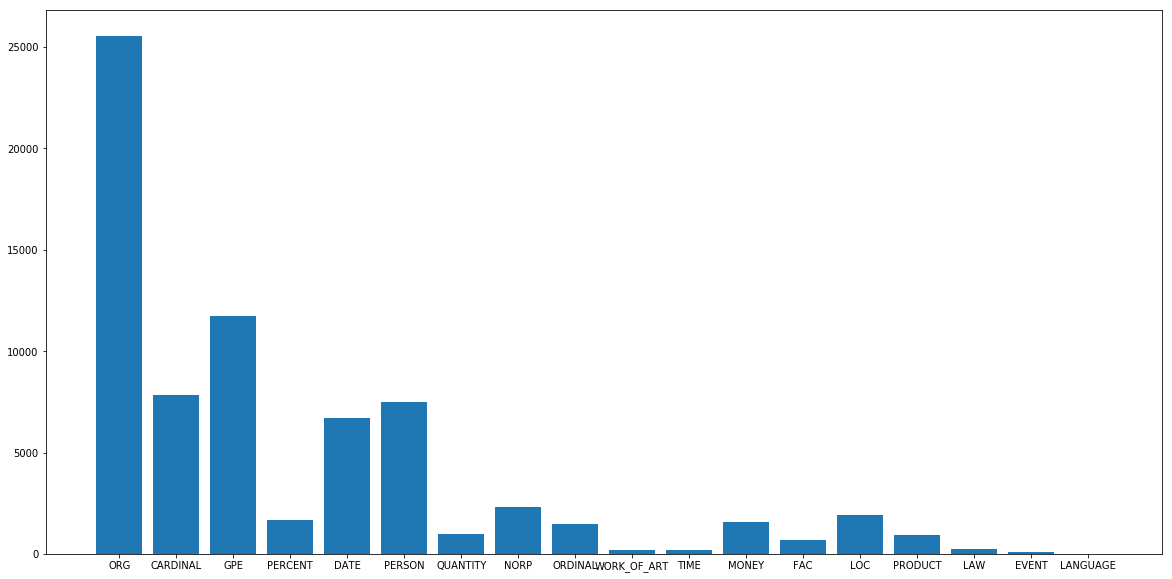

In [26]:
fig = plt.figure(figsize=(20,10))
plt.bar(*zip(*x.items()))

In [10]:
df_1 = pd.DataFrame({'index': list_index, 'ents': list_entities, 'ent_label': list_ent_label})

In [41]:
df_1.head(2)

,index,ents,ent_label
0,0,Trina Solar,ORG
1,0,N-type,ORG


In [28]:
df['test'] = df_1.ent_label

In [29]:
df.head()

,article_body,article_date,article_title,category_1,category_2,category_3,image_link,test
0,Trina Solar recently announced that it has beg...,2019-06-13,Trina Solar launches N-type i-TOPCon double-gl...,Power,Solar,PV,https://www.nsenergybusiness.com/wp-content/up...,ORG
1,Jumbo has been selected by wpd to transport an...,2019-06-13,Jumbo to install WTG substructures for Yunlin ...,Power,Wind,Offshore,https://www.nsenergybusiness.com/wp-content/up...,ORG
3,French consultancy Capgemini's latest report h...,2019-06-13,Just 20% of energy companies are using ‘under-...,Power,Automation,Features & Analysis,https://www.nsenergybusiness.com/wp-content/up...,ORG
4,Atos has signed a multi-year $150m contract to...,2019-06-13,National Grid selects Atos to power up digital...,Power,Transmission and Distribution,Technology,https://www.nsenergybusiness.com/wp-content/up...,CARDINAL
5,Approximately 1 million tonnes of CO2 from the...,2019-06-13,Equinor to release CO2 storage data from Sleip...,Power,Fossil Fuel / Coal and Gas,Carbon Capture Projects and Technology,https://www.nsenergybusiness.com/wp-content/up...,CARDINAL


In [ ]:
df_2 =  pd.DataFrame(df_1['ents'].groupby(df_1['ent_label']).size())


In [ ]:
df_2.columns

In [ ]:
df_org = df_1[(df_1['ent_label'] == 'ORG')]
df_country = df_1[(df_1['ent_label'] == 'GPE')]

In [ ]:
df_org.head()

In [ ]:
# words_freq_table =  pd.DataFrame(frequency_of_words.items()) 
freq = Counter(df_country.ents)
country_most = pd.DataFrame(freq.items())
len(country_most)

In [ ]:
country_most

In [ ]:
tags_1 = Counter(df['category_2'])

fig = plt.figure(figsize=(20,10))
plt.bar(*zip(*tags_1.items()))
# plt.xticks(rotation=90)

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.bar(df_2.index, df_2.ents)

In [ ]:
spacy.explain('NORP')

In [ ]:
text = nlp(articles[0])

In [ ]:
x = []
for article in articles[0:5]:
    x.append(nlp(article))
    
    

In [ ]:
displacy.render(x[1],style="ent",jupyter=True)

In [ ]:
# Use what is already available
df.groupby(df.category_2 == 'Power').count()

In [37]:
articles[0]

"Trina Solar recently announced that it has begun mass production of N-type i-TOPCon double-glass bifacial modules.\nImage: Trina Solar's new high performanceTSM-NEG15MC.20(II) module incorporates i-TOPCon cell technology. Photo courtesy of Trina Solar Co., Ltd.The best front side power output of a module with 144 half-cut i-TOPCon cells reaches 425 Wp, and the best module efficiency reaches 20.7%.The new i-TOPCon double glass PV modules integrate these N-type bifacial i-TOPCon cells with over 80% bifaciality, multi-busbar (MBB) design, full square monocrystalline cells, dual-side and half-cut technologies. The highly efficient modules feature a lower temperature coefficient and low light induced degradation (LID), greatly improving the actual power output. They also provide an extra 5% to 30% power generation from their back side, and feature a 30- year linear power warranty.The world record efficiency of 25.8% on small-area, single side TOPCon cells developed by Fraunhofer ISE has dr

In [39]:
x = nlp(articles[0])

In [47]:
for ent in x.ents:
    if ent.label_ == 'ORG':
        print(ent.text, ent.label_)
    if ent.label_ == 'GPE':
        print(ent.text)

Trina Solar ORG
N-type ORG
Trina Solar's ORG
Trina Solar Co., Ltd ORG
PV
N- ORG
MBB ORG
Fraunhofer ISE ORG
the State Key Laboratory of Photovoltaic Science and Technology ORG
SKL ORG
Trina Solar ORG
Trina Solar ORG
the SKL PVST ORG
Trina Solar’s Changzhou ORG
Trina Solar ORG
SKL ORG
the ISFH CalTeC ORG
Germany
